## Segmentazione della clientela di un'azienda di servizi finanziari

In [119]:
# importo le librerie necessarie all'analisi
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
RANDOM_SEED = 2

In [3]:
df = pd.read_csv("credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

In [4]:
df.shape

(8950, 18)

In [5]:
df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [120]:
# elimino il dato mancante
df = df.dropna(subset=['CREDIT_LIMIT'])

In [121]:
# imputazione dei dati mancanti di MINIMUM_PAYMENTS con la media con pandas
col = "MINIMUM_PAYMENTS"

In [9]:
replace_with = df[col].mean()
df[col] = df[col].fillna(replace_with)
na_count = df[col].isna().sum() 
print(f"La colonna {col} ha {na_count} valori mancanti")
df.head(10)

La colonna MINIMUM_PAYMENTS ha 0 valori mancanti


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [10]:
df = df.drop('CUST_ID', axis=1)

In [122]:
# imposto i paramentri dei grafici
plt.rcParams["figure.figsize"] = (16, 10)
sns.set_theme()

In [123]:
# funzione del grafico dell'elbow method
def plot_ssd_curve(data):
    ssd = {}
    for k in range(1, 10):
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED).fit(data)
        ssd[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
    plt.xlabel("Numero di cluster", fontsize=16)
    plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
    plt.show()


In [124]:
# funzione del grafico visualizzare i cluster

def plot_clusters(model, data, axlabels=None, print_ssd=False):
    y_pred = model.predict(data)
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

    if axlabels!=None:
        plt.xlabel(axlabels[0], fontsize=16)
        plt.ylabel(axlabels[1], fontsize=16)

    if print_ssd:
        plt.text(X[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

    plt.show()

RATE 

In [126]:
data = df[["INSTALLMENTS_PURCHASES", "PURCHASES"]].values

In [127]:
X = scaler.fit_transform(data)

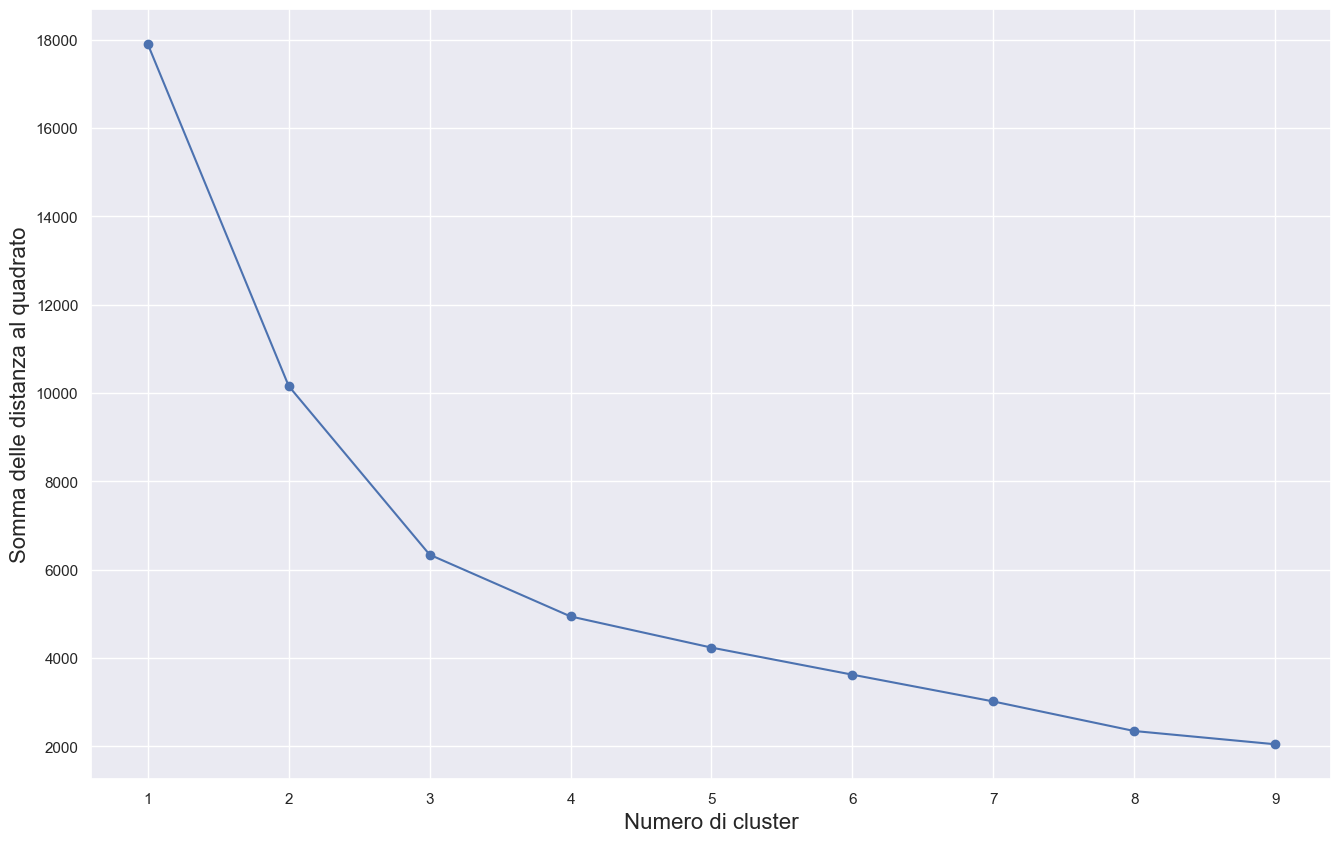

In [128]:
plot_ssd_curve(X)

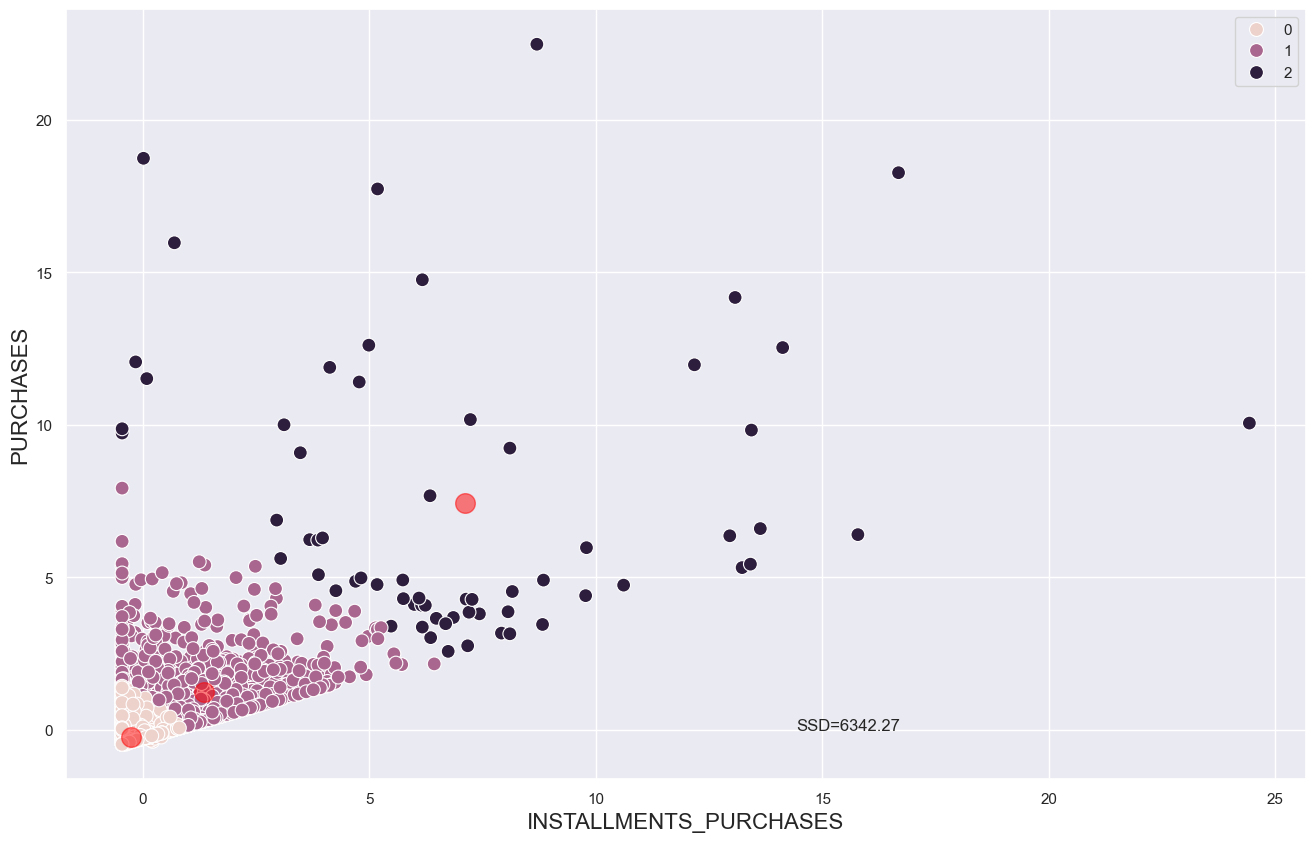

In [129]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["INSTALLMENTS_PURCHASES", "PURCHASES"], print_ssd=True)

In [84]:
data = df[["PURCHASES_INSTALLMENTS_FREQUENCY", "PURCHASES_FREQUENCY"]].values

In [85]:
X = scaler.fit_transform(data)

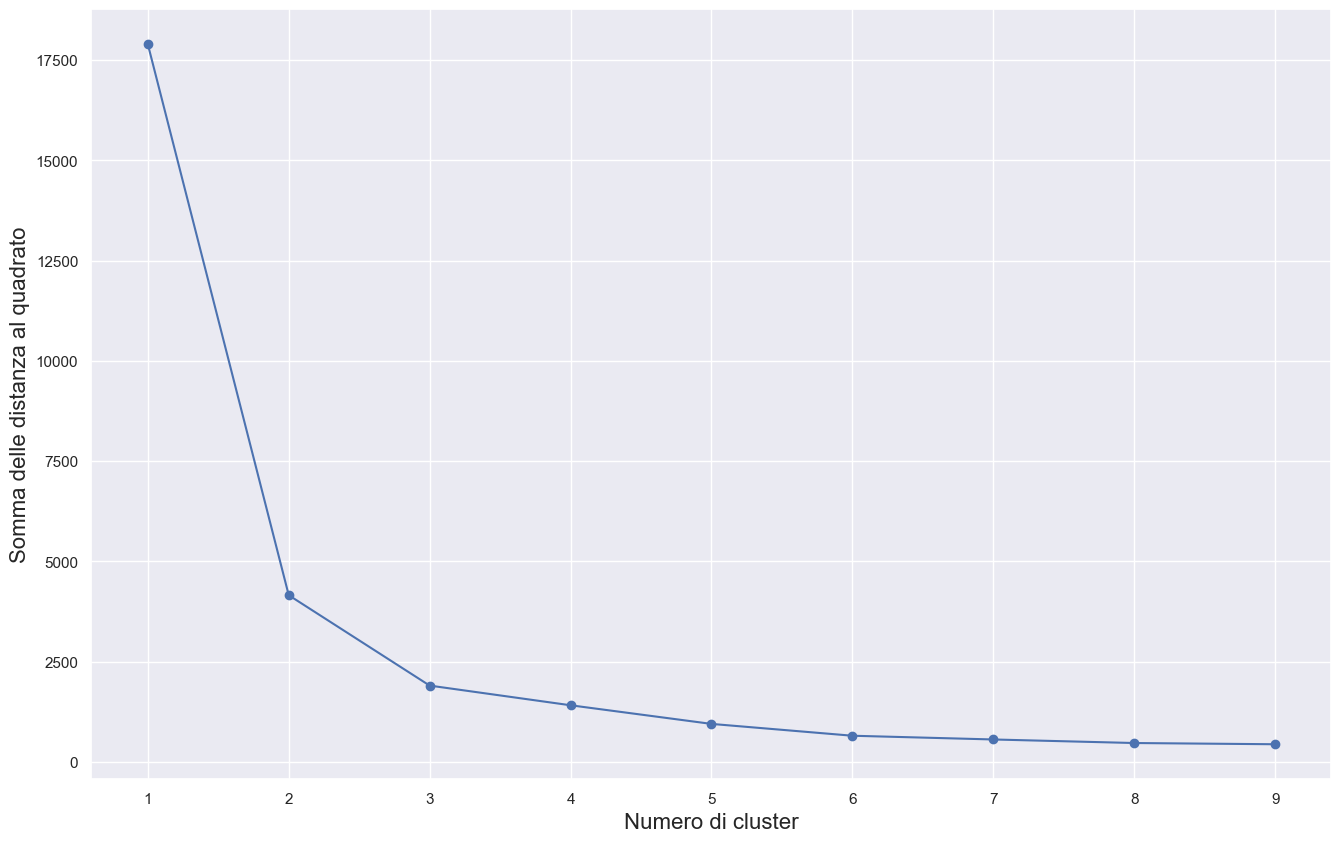

In [86]:
plot_ssd_curve(X)

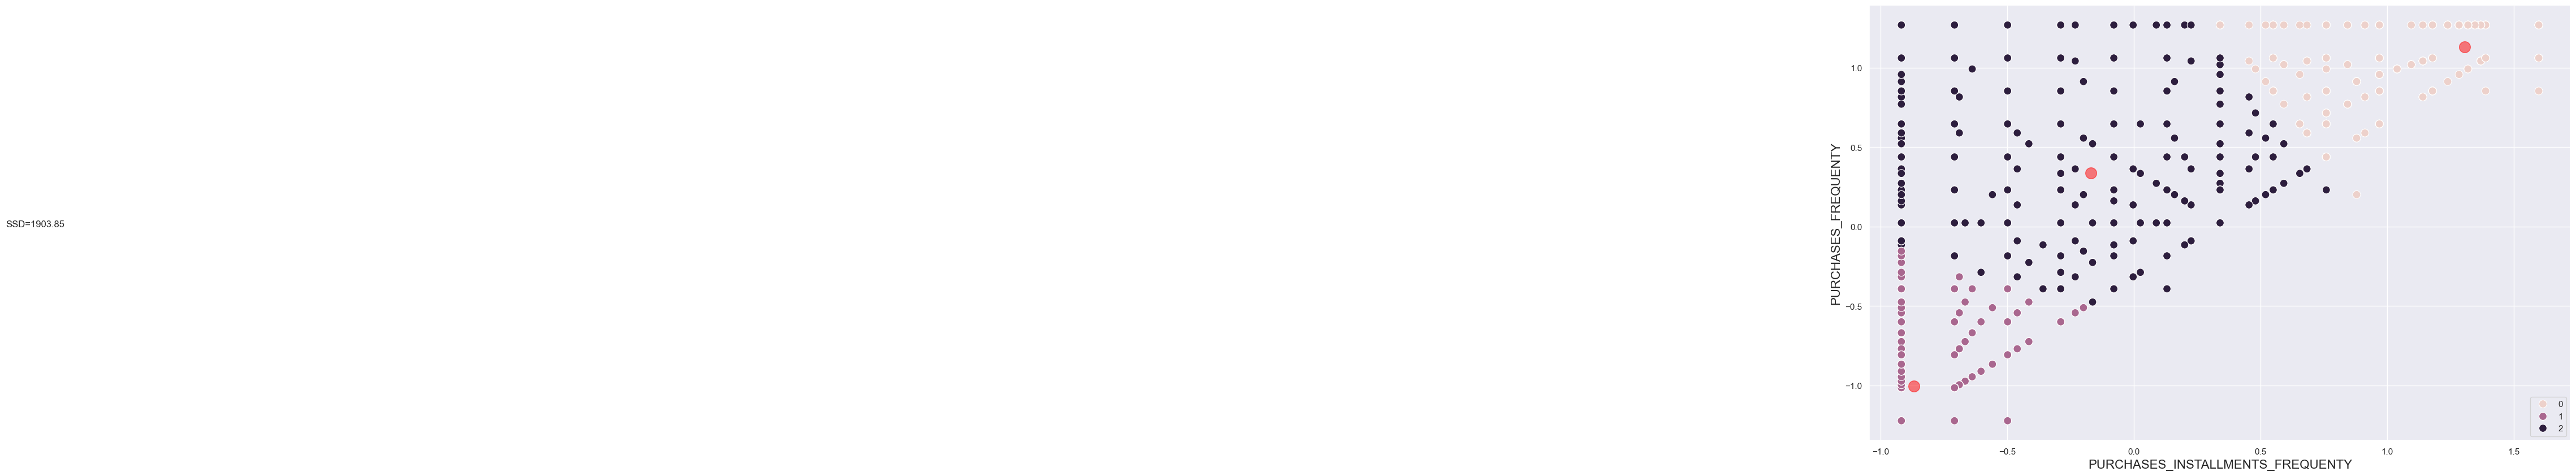

In [87]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["PURCHASES_INSTALLMENTS_FREQUENTY", "PURCHASES_FREQUENTY"], print_ssd=True)

UNICA SOLUZIONE

In [88]:
data = df[["ONEOFF_PURCHASES", "PAYMENTS"]].values

In [89]:
X = scaler.fit_transform(data)

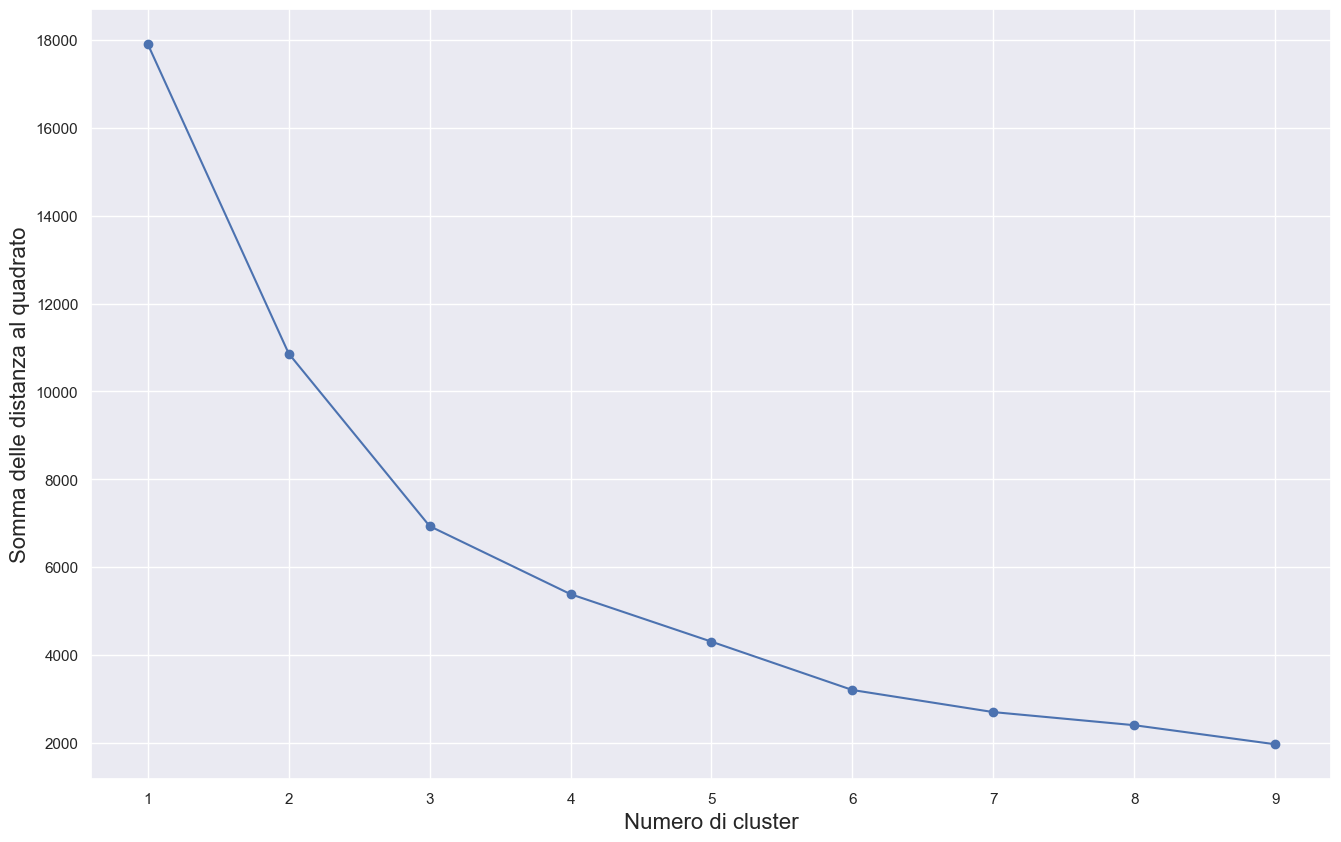

In [90]:
plot_ssd_curve(X)

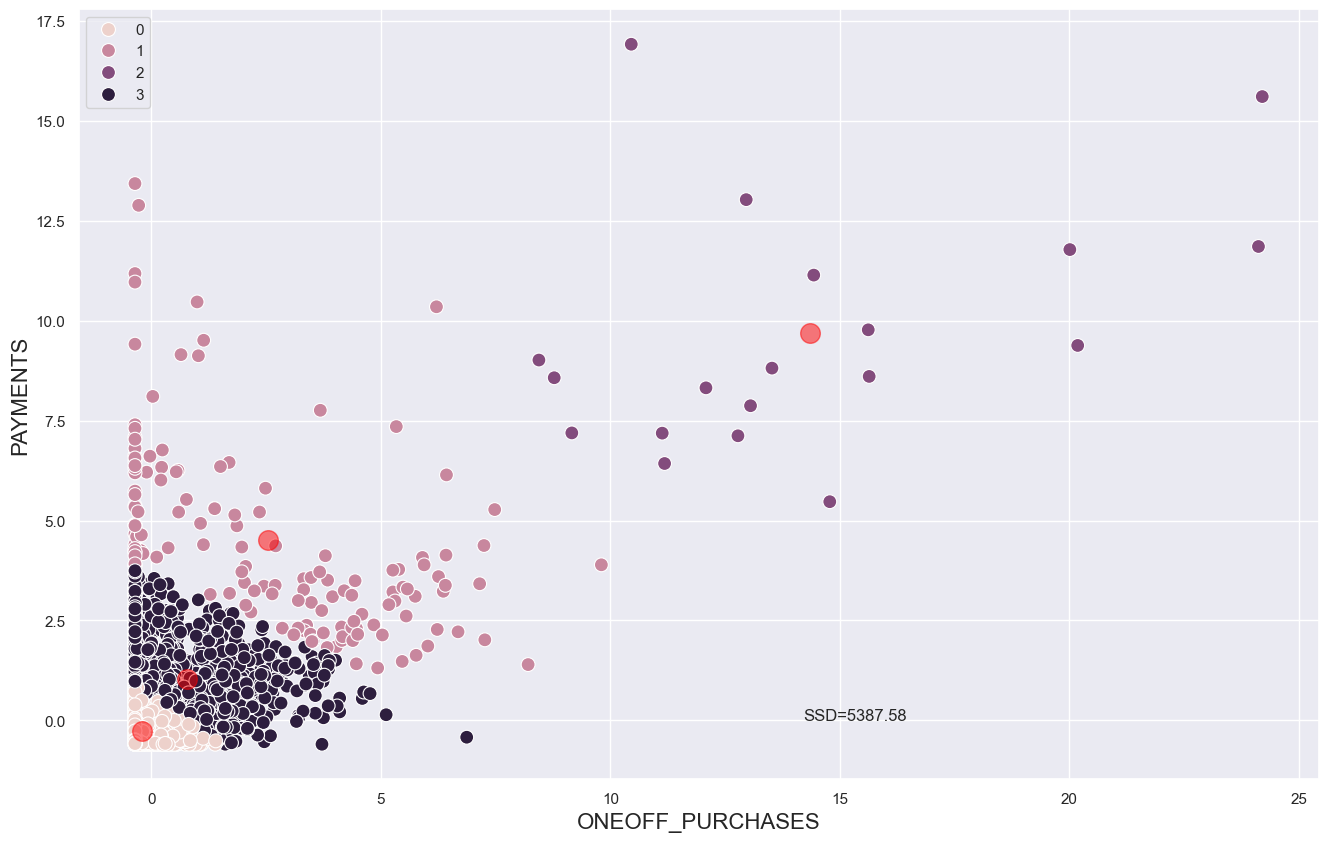

In [91]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["ONEOFF_PURCHASES", "PAYMENTS"], print_ssd=True)

In [80]:
data = df[["ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_FREQUENCY"]].values

In [81]:
X = scaler.fit_transform(data)

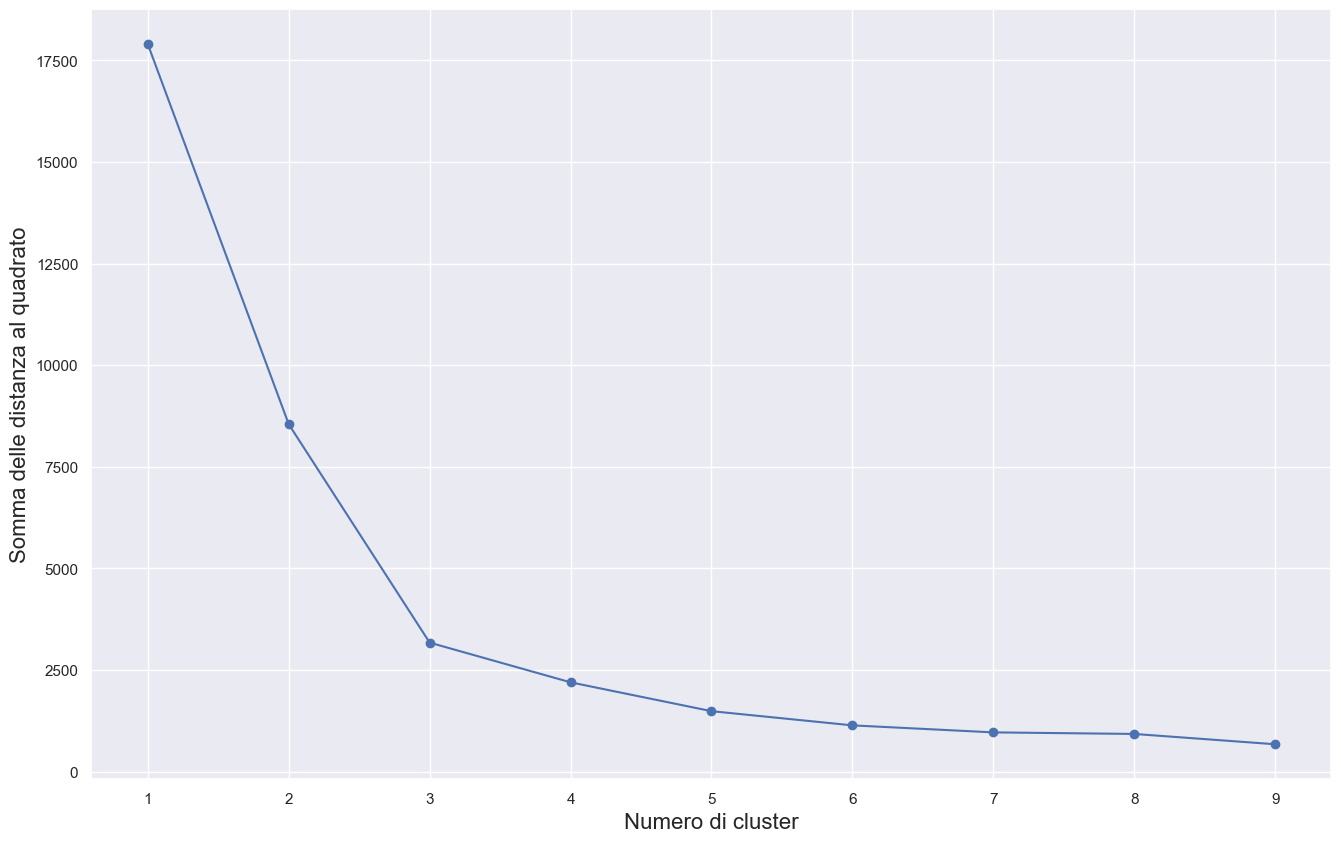

In [82]:
plot_ssd_curve(X)

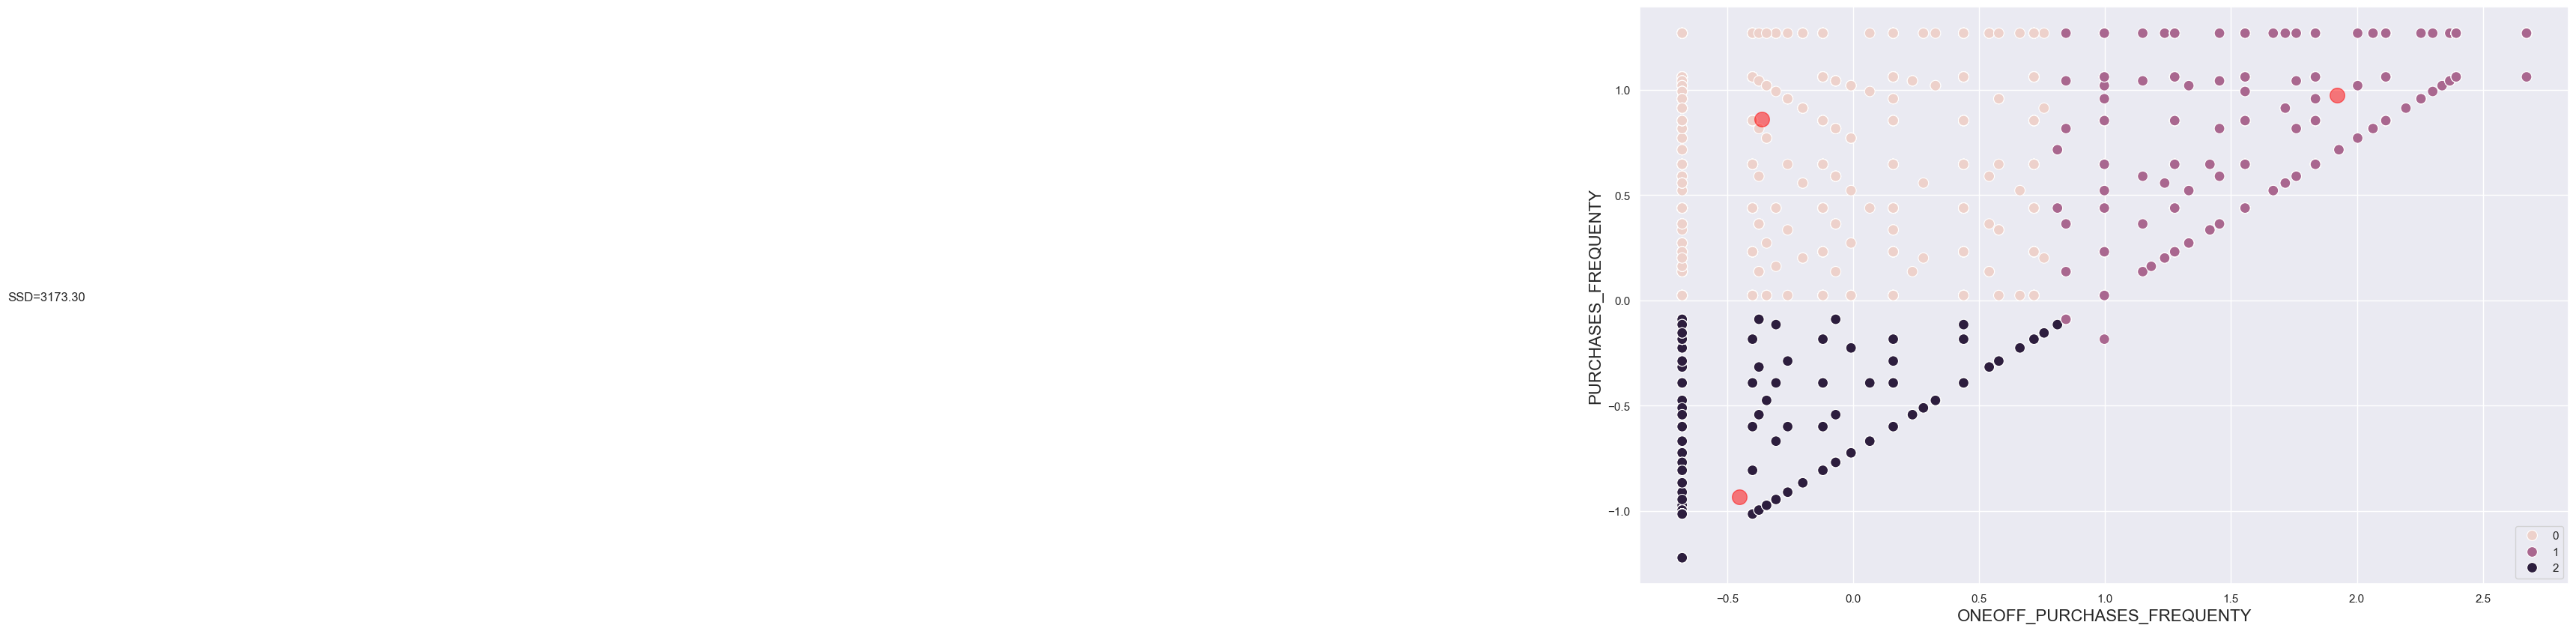

In [83]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["ONEOFF_PURCHASES_FREQUENTY", "PURCHASES_FREQUENTY"], print_ssd=True)

ANTICIPO IN CONTANTI

In [92]:
data = df[["CASH_ADVANCE", "PAYMENTS"]].values

In [94]:
X = scaler.fit_transform(data)

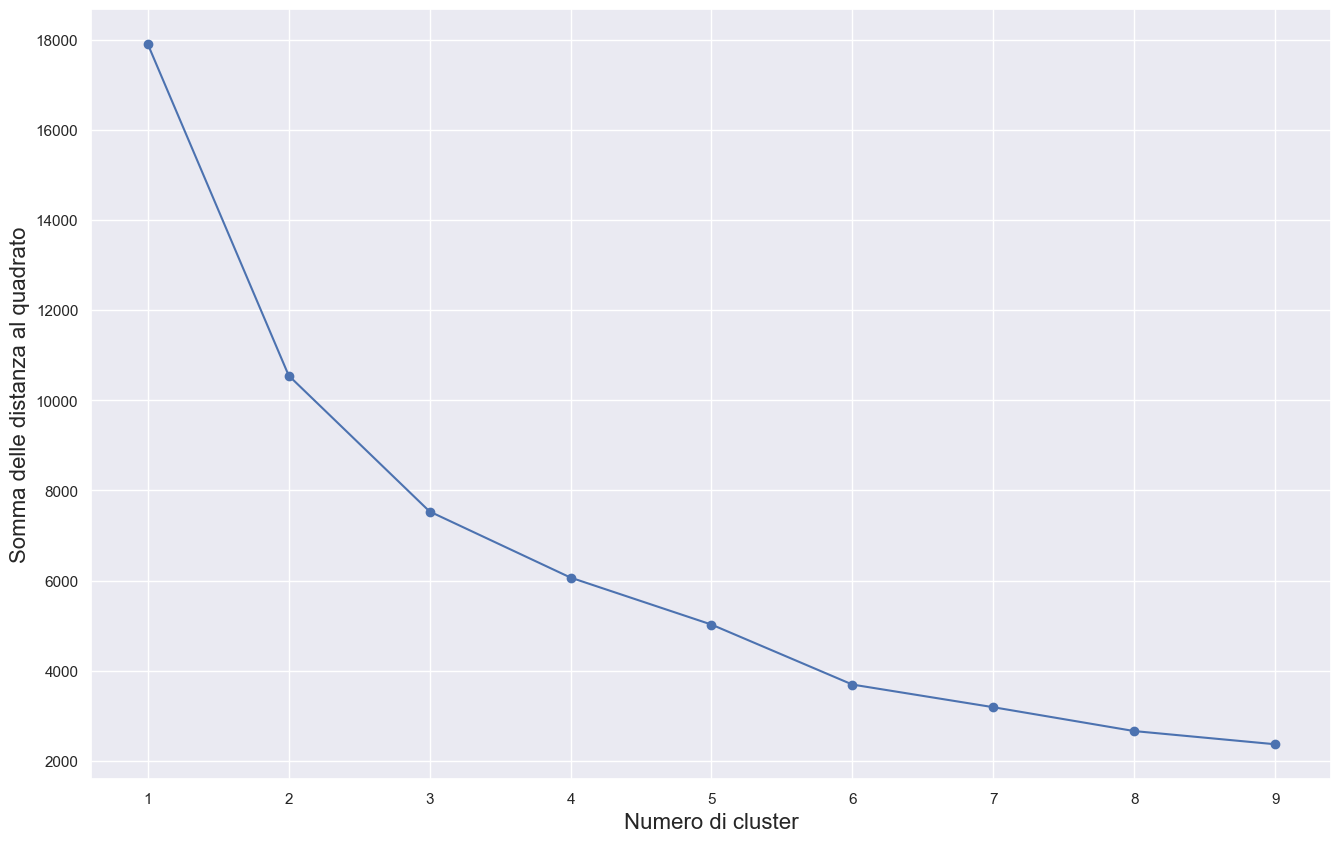

In [95]:
plot_ssd_curve(X)

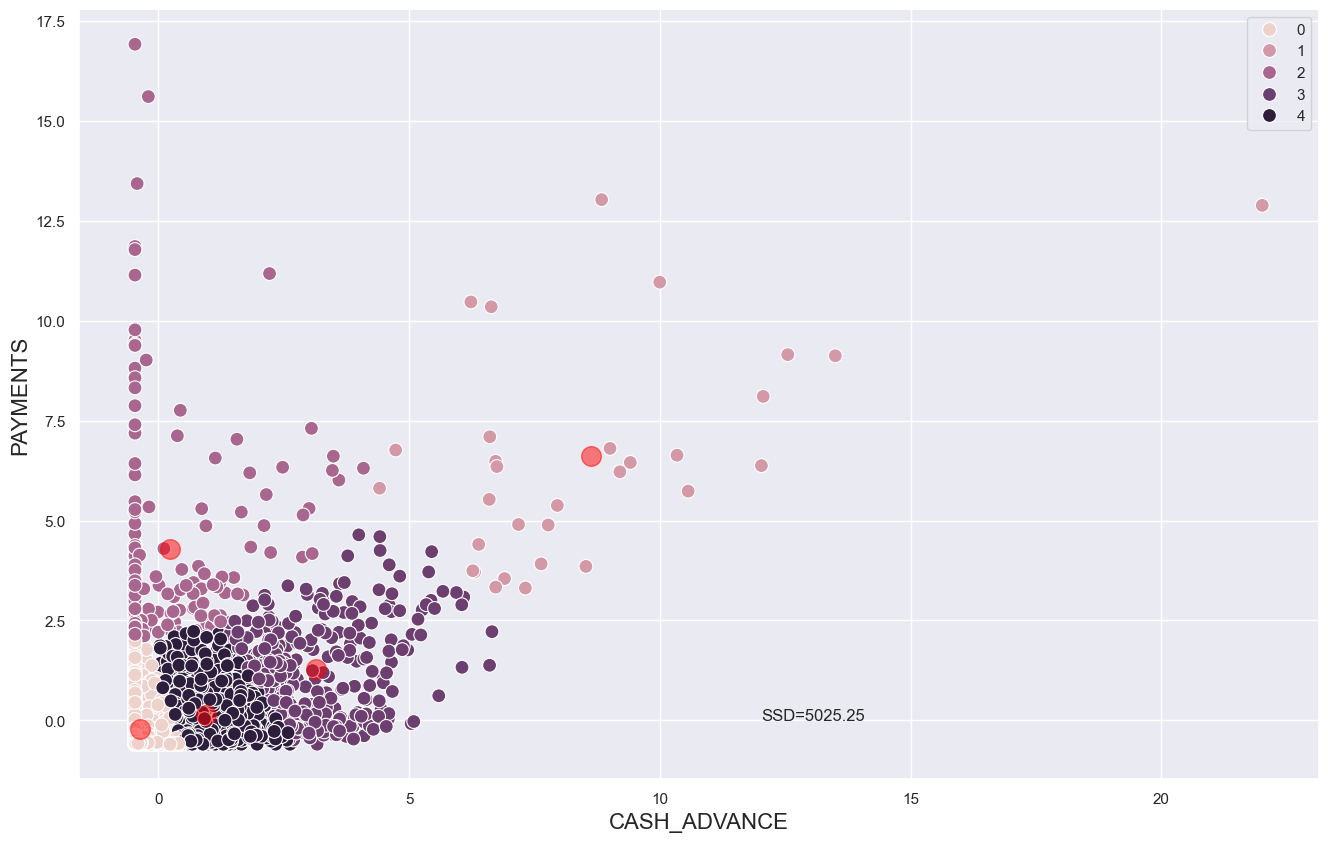

In [100]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["CASH_ADVANCE", "PAYMENTS"], print_ssd=True)

Dall'analisi svolta l'azienda dovrebbe creare diverse campagne di marketing; una parte dei suoi clienti infatti completa gli acquisti in una soluzione, un'altra a rate e un'ultima paga l'anticipo in contanti, e dedicare a ognuno di loro una campagna diversa in base all'utilizzo del conto. Inoltre potrebbe personalizzare la promozione delle carte di credito in base all'importo del saldo nel conto e alla frequenza degli acquisti e all'importo dei pagamenti. 